In [1]:
import glob
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow

In [2]:
path = glob.glob("/Users/manishatakale/Downloads/HackathonePractice/ImageData/test_another/damage/*.jpeg")
test = np.array([np.array(imread(img)) for img in path])


In [3]:
test_matrix = np.zeros((8000,128,128)) 
for i in range(0,test.shape[0]):
    for j in range(0,test.shape[1]):
        for k in range(0,test.shape[2]):
            test_matrix[i][j][k] = ((int(test[i,j,k,0]) + int(test[i,j,k,1]) + int(test[i,j,k,2]))/3)

In [4]:
test_matrix[0].shape

(128, 128)

In [5]:
test_matrix_x = np.reshape(test_matrix,(8000,128*128))

/Users/manishatakale/opt/anaconda3/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:78: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


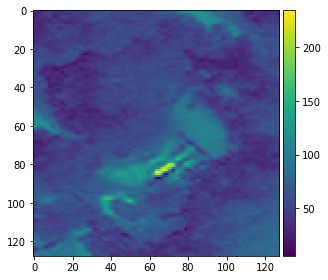

In [6]:
imshow(test_matrix[0])

In [7]:
path = glob.glob("/Users/manishatakale/Downloads/HackathonePractice/ImageData/test_another/no_damage/*.jpeg")
test_no = np.array([np.array(imread(img)) for img in path])
test_matrix_no = np.zeros((8000,128,128)) 
for i in range(0,test_no.shape[0]):
    for j in range(0,test_no.shape[1]):
        for k in range(0,test_no.shape[2]):
            test_matrix_no[i][j][k] = ((int(test_no[i,j,k,0]) + int(test_no[i,j,k,1]) + int(test_no[i,j,k,2]))/3)

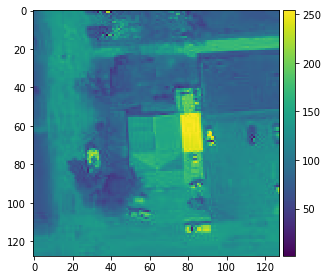

In [8]:
imshow(test_matrix_no[0])

In [9]:
test_matrix_no.shape

(8000, 128, 128)

In [10]:
test_matrix_no_x = np.reshape(test_matrix_no,(8000,128*128))

In [11]:
df = pd.DataFrame(test_matrix_x)
df_no = pd.DataFrame(test_matrix_no_x)
X_test =pd.concat([df, df_no], axis=0)
X_test = X_test.sample(frac=1).reset_index(drop=True)

In [13]:
X_test = np.array(X_test.values)

In [15]:
X_test.shape

(16000, 16384)

In [ ]:
np.save('X_test',X_test)